In [1]:
#코랩환경에서는 한글 설치 후 세션을 재시작해야한다.
# 한글폰트 설치
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

# 나눔고딕폰트로 matplotlib폰트 변경
# from matplotlib import font_manager, rc
# import matplotlib.pyplot as plt
# plt.rc('font', family='NanumBarunGothic')


In [2]:
#윈도우 한글설치

import platform
from matplotlib import font_manager, rc

path = "c:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)

import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic') 

In [20]:
import pandas as pd

# 고정된 학생 데이터 생성
students = ['학생1', '학생2', '학생3', '학생4', '학생5']
subjects = ['국어', '영어', '수학', '과학', '사회']

data = {
    '국어': [85, 90, 75, 80, 95],
    '영어': [88, 92, 78, 85, 94],
    '수학': [90, 85, 88, 92, 79],
    '과학': [82, 95, 91, 89, 84],
    '사회': [79, 85, 87, 90, 93],
    '학생': students
}

df = pd.DataFrame(data)

In [21]:
df.set_index('학생', inplace=True)
df.index.name = None
df

,국어,영어,수학,과학,사회
학생1,85,88,90,82,79
학생2,90,92,85,95,85
학생3,75,78,88,91,87
학생4,80,85,92,89,90
학생5,95,94,79,84,93


In [22]:
#각 과목의 평균값
df.mean(axis=0)

국어    85.0
영어    87.4
수학    86.8
과학    88.2
사회    86.8
dtype: float64

In [23]:
#학생별 과목총점과 평균컬럼 추가 

df['총점'] = df.sum(axis=1)


In [24]:
df

,국어,영어,수학,과학,사회,총점
학생1,85,88,90,82,79,424
학생2,90,92,85,95,85,447
학생3,75,78,88,91,87,419
학생4,80,85,92,89,90,436
학생5,95,94,79,84,93,445


In [30]:
df['평균'] = df.loc[:,'국어':'사회'].mean(axis=1)

In [31]:
df

,국어,영어,수학,과학,사회,총점,평균
학생1,85,88,90,82,79,424,84.8
학생2,90,92,85,95,85,447,89.4
학생3,75,78,88,91,87,419,83.8
학생4,80,85,92,89,90,436,87.2
학생5,95,94,79,84,93,445,89.0


In [35]:
#과목별 최고점과 최저점 학생 찾기 
#df에는 총점과 평균까지 포함되어 있으므로 
#새로운 데이터프레임을 만든다.

df_subject = df[['국어','영어','수학','과학','사회']]
highest_scores = df_subject.idxmax()
lowest_scores = df_subject.idxmin()

print("가장 높은 점수를 받은 학생:")
print(highest_scores)
print("\n가장 낮은 점수를 받은 학생:")
print(lowest_scores)

가장 높은 점수를 받은 학생:
국어    학생5
영어    학생5
수학    학생4
과학    학생2
사회    학생5
dtype: object

가장 낮은 점수를 받은 학생:
국어    학생3
영어    학생3
수학    학생5
과학    학생1
사회    학생1
dtype: object


In [36]:
df_avg = df_subject.mean()

In [37]:
df_avg

국어    85.0
영어    87.4
수학    86.8
과학    88.2
사회    86.8
dtype: float64

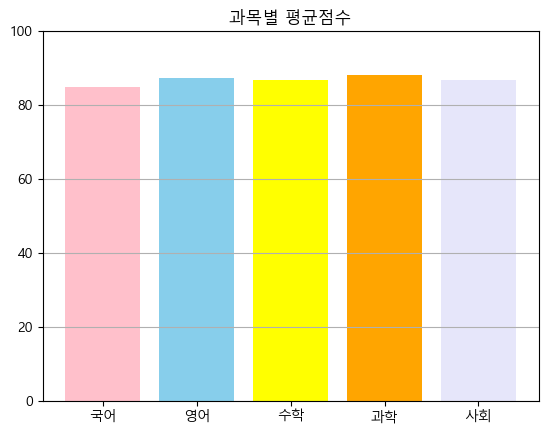

In [126]:
import matplotlib.pyplot as plt

# df_avg.plot(kind = 'bar')
colors = ['pink','skyblue','yellow','orange','lavender']
plt.bar(df_avg.index, df_avg.values,color = colors)
# plt.xlabel('과목')
# plt.ylabel('평균점수')
plt.title('과목별 평균점수')
plt.ylim(0,100)
plt.grid(axis = 'y')

#x축 눈금 라벨링
plt.xticks(df_avg.index, rotation = 0)

plt.show()

In [52]:
data = pd.read_excel('식권.xlsx',header = 2)

In [53]:
data.head()

,사용일시,Unnamed: 1,Unnamed: 2,Unnamed: 3,가맹점,가맹점업종,승인금액,식권
0,2023-10-04,11:57:13,NaN,NaN,미스사이공 고덕푸르지오점,한식 음식점업,7000,새싹강동
1,2023-10-04,11:57:43,NaN,NaN,버거타임(BURGER TIME),양식,8000,새싹강동
2,2023-10-04,11:58:29,NaN,NaN,버거타임(BURGER TIME),양식,8000,새싹강동
3,2023-10-04,11:58:31,NaN,NaN,미스사이공 고덕푸르지오점,한식 음식점업,8000,새싹강동
4,2023-10-04,11:58:44,NaN,NaN,버거타임(BURGER TIME),양식,8000,새싹강동


In [54]:
data.columns
data.drop(['Unnamed: 2','Unnamed: 3','식권'], axis = 1, inplace = True)

In [55]:
data

,사용일시,Unnamed: 1,가맹점,가맹점업종,승인금액
0,2023-10-04,11:57:13,미스사이공 고덕푸르지오점,한식 음식점업,7000
1,2023-10-04,11:57:43,버거타임(BURGER TIME),양식,8000
2,2023-10-04,11:58:29,버거타임(BURGER TIME),양식,8000
3,2023-10-04,11:58:31,미스사이공 고덕푸르지오점,한식 음식점업,8000
4,2023-10-04,11:58:44,버거타임(BURGER TIME),양식,8000
...,...,...,...,...,...
2548,2024-02-23,18:40:24,사천루,외국식 음식점업,8000
2549,2024-02-26,18:50:20,GS25 메가스퀘어점,편의점,8000
2550,2024-02-27,18:49:59,GS25강남쌍용점,편의점,8000
2551,2024-02-28,18:17:55,GS25 강일9단지점,편의점,8000


In [105]:
#컬럼명 변경

data.rename(columns = {'Unnamed: 1' : '사용시간'},inplace = True)

In [69]:
#가맹점 별 합계 금액 시리즈 만들기 

data_total = data.groupby('가맹점')['승인금액'].sum()   #시리즈
data_total = pd.DataFrame(data_total)   #데이터프레임
data_total

,승인금액
가맹점,
(일반) 롯데쇼핑 롯데몰 수원점,4700
(주)골드그린마트,24000
CU 가락점,39000
CU 강남자곡점,3200
CU 강동그라시움점,6000
...,...
한성관,8000
햇살약국,3000
협동조합아낌없이주는나무,9600


In [91]:
#가맹점 별 총 방문 횟수 시리즈 만들기

data_count = data.groupby('가맹점')['사용일시'].count().sort_values(ascending=False)
data_count.name = 'count'
data_count = pd.DataFrame(data_count)
data_count

,count
가맹점,
덮밥장사장 상일동역점,195
린칭,173
미스사이공 고덕푸르지오점,170
김밥천국,160
아비꼬 상일동역점,143
...,...
동보성,1
도담한상,1
다이소 한티역점,1


In [94]:
#store_df [가맹점명-인덱스, 총 사용금액,사용빈도]

store_df = data.groupby('가맹점')['승인금액'].sum()
store_df.name = '총 사용금액'
store_df = pd.concat([store_df, data_count],axis = 1)
store_df

,총 사용금액,count
가맹점,,
(일반) 롯데쇼핑 롯데몰 수원점,4700,1
(주)골드그린마트,24000,3
CU 가락점,39000,5
CU 강남자곡점,3200,1
CU 강동그라시움점,6000,1
...,...,...
한성관,8000,1
햇살약국,3000,1
협동조합아낌없이주는나무,9600,3


In [107]:
df_Jang = data[data['가맹점']=='덮밥장사장 상일동역점'].reset_index(drop = True)

In [108]:
df_Jang

,사용일시,사용시간,가맹점,가맹점업종,승인금액
0,2023-10-04,12:07:57,덮밥장사장 상일동역점,외국식 음식점업,8000
1,2023-10-05,12:03:03,덮밥장사장 상일동역점,외국식 음식점업,8000
2,2023-10-05,12:04:02,덮밥장사장 상일동역점,외국식 음식점업,8000
3,2023-10-05,12:04:14,덮밥장사장 상일동역점,외국식 음식점업,8000
4,2023-10-05,18:09:33,덮밥장사장 상일동역점,외국식 음식점업,8000
...,...,...,...,...,...
190,2024-02-07,11:57:28,덮밥장사장 상일동역점,외국식 음식점업,8000
191,2024-02-16,11:49:10,덮밥장사장 상일동역점,외국식 음식점업,8000
192,2024-02-16,12:02:31,덮밥장사장 상일동역점,외국식 음식점업,8000
193,2024-02-16,12:03:54,덮밥장사장 상일동역점,외국식 음식점업,8000


In [109]:
#datetime으로 변경하기

df_Jang['사용일시'] = pd.to_datetime(df_Jang['사용일시'])

In [114]:
#df_Jang의 월별 매출 합 구하기 

df_Jang2 = df_Jang.copy()
df_Jang2['연도'] = df_Jang2['사용일시'].dt.year
df_Jang2['월'] = df_Jang2['사용일시'].dt.month

#추가된 연도와 월을 합하여 'YYYY-MM'포맷으로
df_Jang2['사용연월'] = df_Jang2['연도'].astype(str) + '-' + df_Jang2['월'].astype(str)


df_Jang2.groupby('사용연월')['승인금액'].sum()

사용연월
2023-10    440000
2023-11    308700
2023-12    378200
2024-1     317500
2024-2     104000
Name: 승인금액, dtype: int64

TypeError: 'str' object is not callable

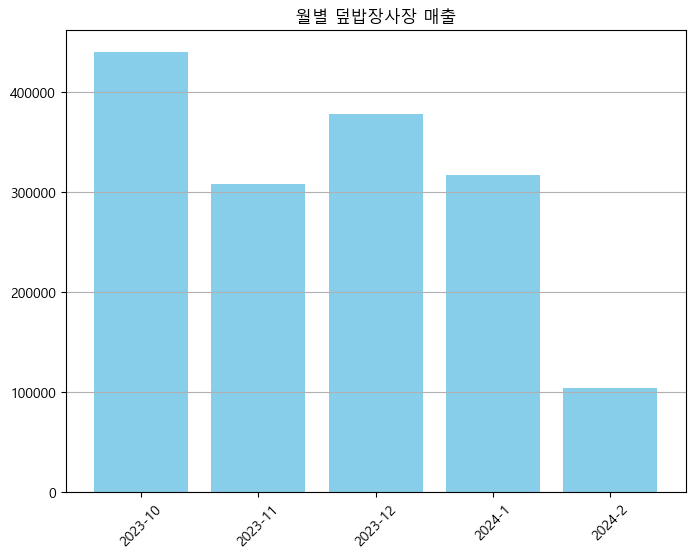

In [137]:
#덮밥집 매출 그래프 


import matplotlib.pyplot as plt

df_graph = df_Jang2.groupby('사용연월')['승인금액'].sum()
plt.figure(figsize=(8,6))
plt.bar(df_graph.index, df_graph.values, color = 'skyblue')

plt.xticks(rotation = 45)
plt.title("월별 덮밥장사장 매출")
plt.grid(axis='y')

# 왜 안되지..
plt.xlabel("월(23.10~24,2)")
plt.ylabel("매출(원)")

plt.show()

In [164]:
# 부정사용 컬럼 추가하기
# 오전 7시 ~ 오후 8시까지 식권 사용시간 
# 이후 시간 사용기록은 부정사용에서 true로 값이 들어가게 컬럼 추가하기 
# 어려웠음

from datetime import time

# 컬럼을 만든다
data['부정사용'] = False    #기본값은 False

# # 7시~20시 이외의 사용 시간 찾기
data['부정사용'] = (data['사용시간'] < time(7,0,0)) | (data['사용시간'] > time(20,0,0))
data['부정사용'].sum()

data.loc[data['부정사용']==True].index.tolist()

data
data['부정사용'].value_counts()

부정사용
False    2507
True       46
Name: count, dtype: int64